In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accident_coords_update.ipynb
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Areas.shp
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Local_Authority_Districts_Dec_2016.geojson


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {'axes.axisbelow': False})

import warnings
warnings.filterwarnings("ignore")

In [3]:
first_data = pd.read_csv("/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv")
second_data = pd.read_csv("/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv")
third_data = pd.read_csv("/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv")

In [4]:
data = pd.concat([first_data, second_data, third_data])
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,1504049.0,439621.405078,95116.160326,64950.000000,375060.000000,439960.000000,523060.000000,6.553700e+05
Location_Northing_OSGR,1504049.0,300158.403995,161008.382735,10290.000000,178260.000000,268830.000000,398151.000000,1.208800e+06
Longitude,1504049.0,-1.436625,1.398078,-7.516225,-2.373902,-1.403714,-0.221510,1.759398e+00
Latitude,1504049.0,52.589399,1.449889,49.912941,51.490156,52.309126,53.478581,6.075754e+01
Police_Force,1504150.0,30.205364,25.516033,1.000000,6.000000,30.000000,45.000000,9.800000e+01
Accident_Severity,1504150.0,2.838190,0.401842,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,1504150.0,1.831606,0.714759,1.000000,1.000000,2.000000,2.000000,6.700000e+01
Number_of_Casualties,1504150.0,1.350960,0.825335,1.000000,1.000000,1.000000,1.000000,9.300000e+01
Day_of_Week,1504150.0,4.118607,1.924405,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),1504150.0,347.614855,259.429163,1.000000,110.000000,322.000000,518.000000,9.410000e+02


In [6]:
dataset = data.loc[:, ["Accident_Severity", "Date", "Day_of_Week", "Time", "Speed_limit", 
                        "Road_Type", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions",
                        "Carriageway_Hazards", "Urban_or_Rural_Area", "Year",
                        "Number_of_Vehicles", "Number_of_Casualties"]]

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Accident_Severity        1504150 non-null  int64 
 1   Date                     1504150 non-null  object
 2   Day_of_Week              1504150 non-null  int64 
 3   Time                     1504033 non-null  object
 4   Speed_limit              1504150 non-null  int64 
 5   Road_Type                1504150 non-null  object
 6   Light_Conditions         1504150 non-null  object
 7   Weather_Conditions       1504024 non-null  object
 8   Road_Surface_Conditions  1502192 non-null  object
 9   Carriageway_Hazards      1504121 non-null  object
 10  Urban_or_Rural_Area      1504150 non-null  int64 
 11  Year                     1504150 non-null  int64 
 12  Number_of_Vehicles       1504150 non-null  int64 
 13  Number_of_Casualties     1504150 non-null  int64 
dtypes: 

In [8]:
dataset.isnull().sum()

Accident_Severity             0
Date                          0
Day_of_Week                   0
Time                        117
Speed_limit                   0
Road_Type                     0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Carriageway_Hazards          29
Urban_or_Rural_Area           0
Year                          0
Number_of_Vehicles            0
Number_of_Casualties          0
dtype: int64

In [9]:
dataset.dropna(inplace=True)
dataset.shape

(1501937, 14)

In [10]:
dataset.Date.head()

0    04/01/2005
1    05/01/2005
2    06/01/2005
3    07/01/2005
4    10/01/2005
Name: Date, dtype: object

In [11]:
dataset["Day"] = dataset.Date.apply(lambda x: str(x).split("/")[0]).values.astype("int64")
dataset["Month"] = dataset.Date.apply(lambda x: str(x).split("/")[1]).values.astype("int64")
dataset.drop({"Date"}, axis=1, inplace=True)

In [12]:
months = {1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Ag", 
          9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

dataset.Month = dataset.Month.apply(lambda x: months[x])

In [13]:
dataset.loc[:,["Day", "Month"]].head()

,Day,Month
0,4,Jan
1,5,Jan
2,6,Jan
3,7,Jan
4,10,Jan


In [14]:
days = {1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 
       6:"Saturday", 7:"Sunday"}

dataset.Day_of_Week = dataset.Day_of_Week.apply(lambda x: days[x])
dataset.Day_of_Week.head()

0    Wednesday
1     Thursday
2       Friday
3     Saturday
4      Tuesday
Name: Day_of_Week, dtype: object

In [15]:
dataset.Time.head()

0    17:42
1    17:36
2    00:15
3    10:35
4    21:13
Name: Time, dtype: object

In [16]:
dataset["Hour"] = dataset.Time.apply(lambda x: str(x).split(":")[0]).values.astype("int64")
dataset.drop({"Time"}, axis=1, inplace=True)

In [17]:
dataset.Hour.head()

0    17
1    17
2     0
3    10
4    21
Name: Hour, dtype: int64

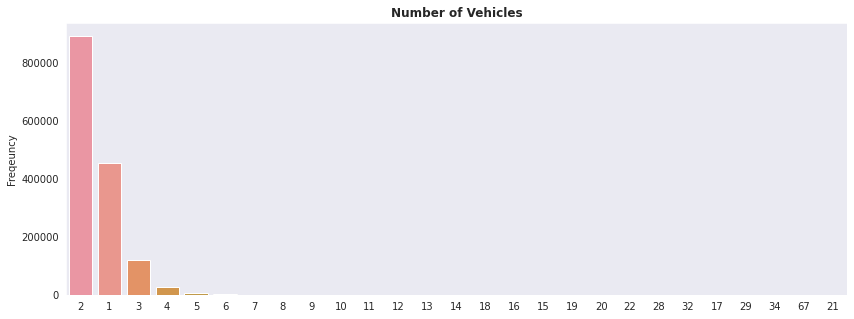

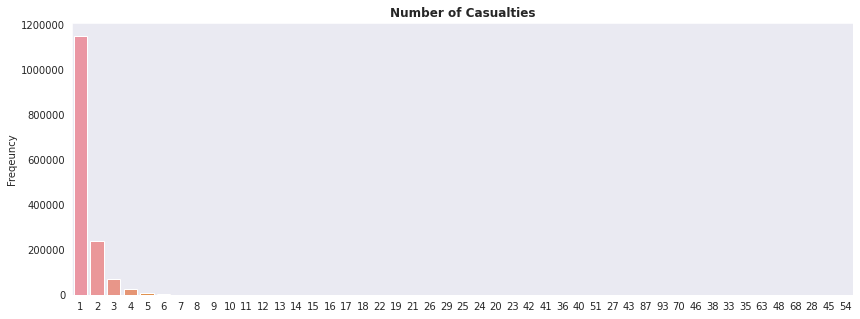

In [18]:
for column in ["Number_of_Vehicles", "Number_of_Casualties"]:
    var_value = dataset[column].value_counts()
    
    plt.figure(figsize=(14,5))
    
    plt.grid(False)
    sns.barplot(x=var_value.index, y=var_value, order=var_value.index)    
    
    plt.title(" ".join(column.split("_")), weight="bold")
    plt.ylabel("Freqeuncy")
    plt.ticklabel_format(style='plain', axis='y')

In [19]:
def categorization_feature(value):
    if value == 1:
        return "1"
    if value == 2:
        return "2"
    if value == 3:
        return "3"
    if 4 <= value <= 6:
        return "4-6"
    else:
        return "7 and more"

dataset.Number_of_Vehicles = dataset.Number_of_Vehicles.apply(categorization_feature)
dataset.Number_of_Casualties = dataset.Number_of_Casualties.apply(categorization_feature)

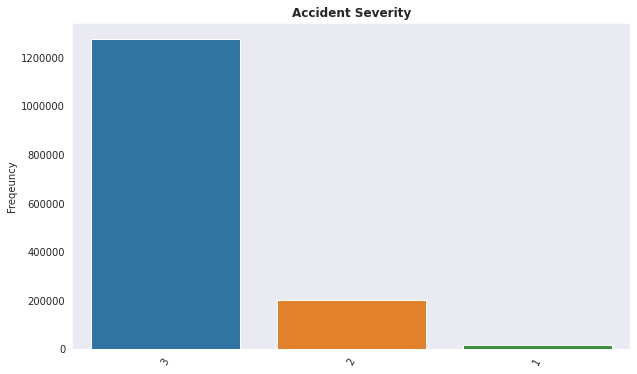

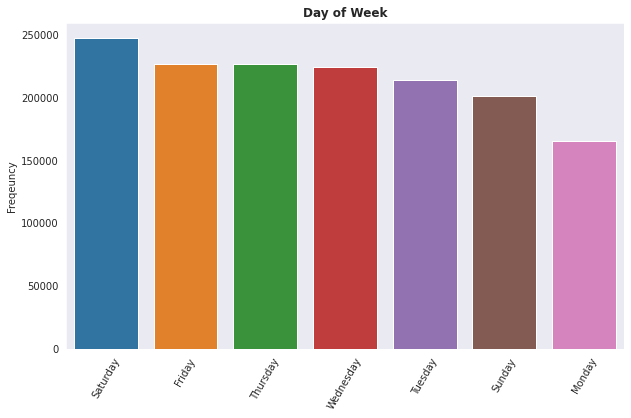

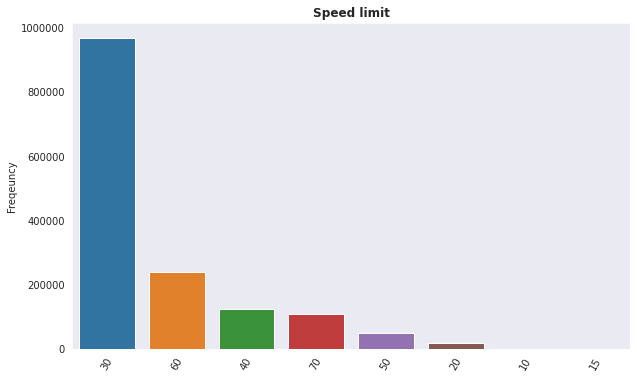

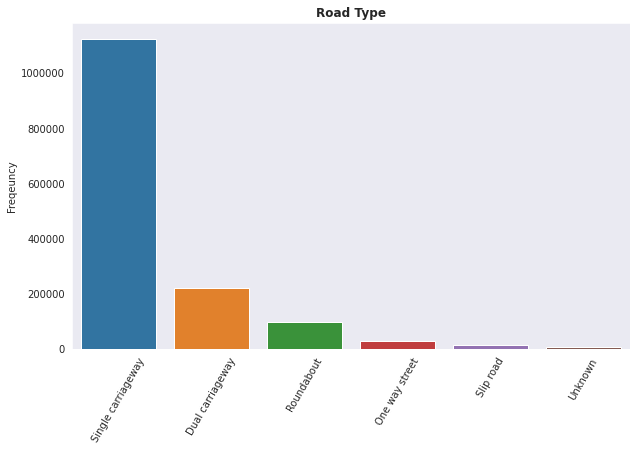

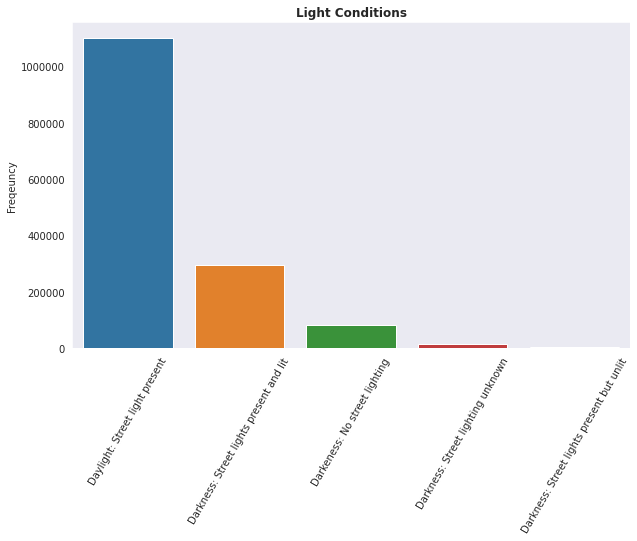

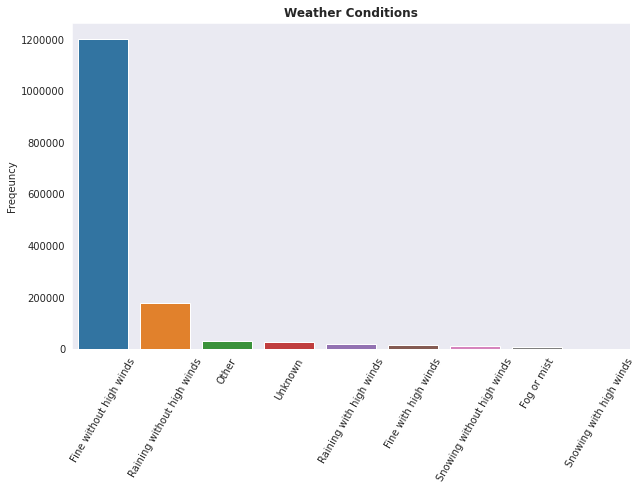

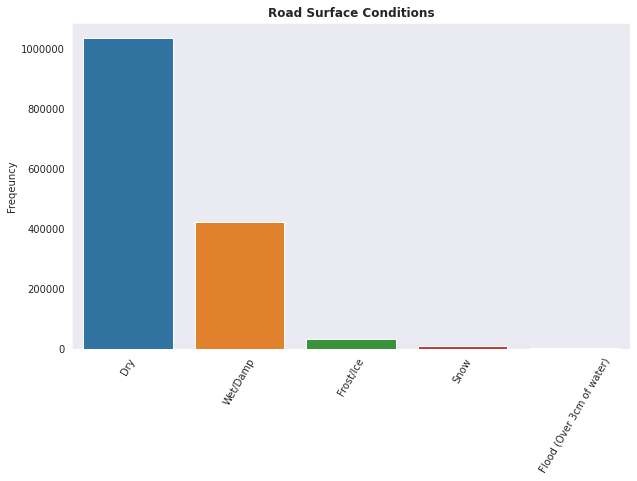

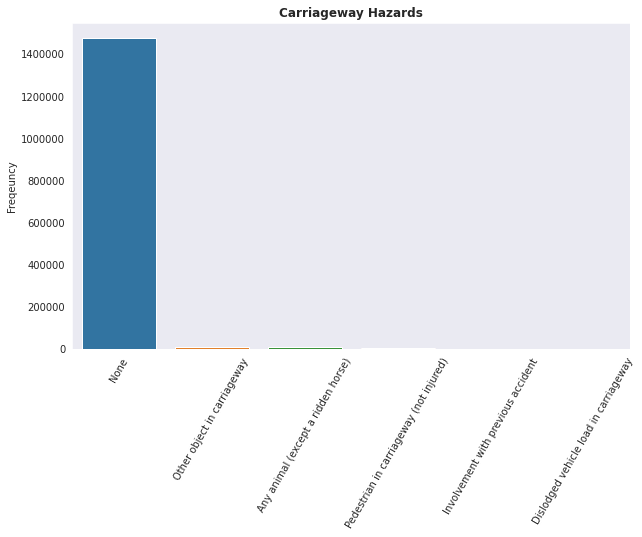

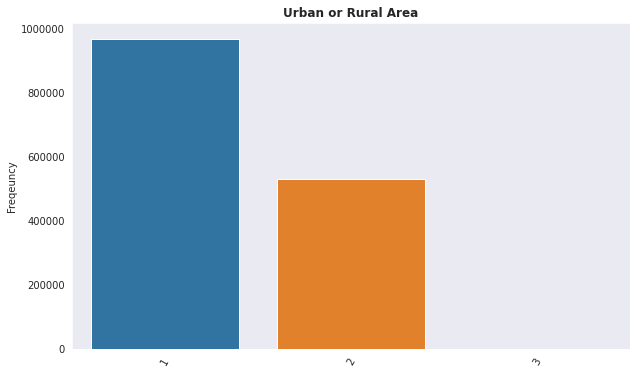

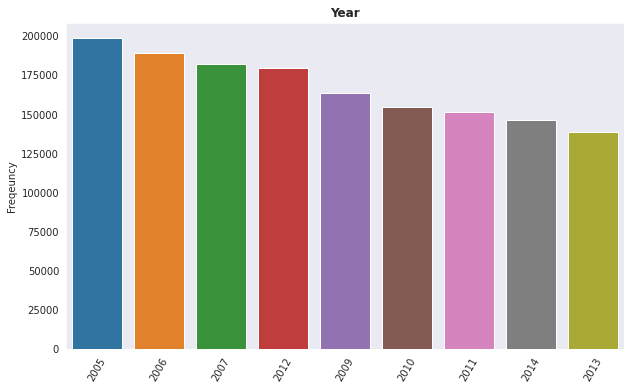

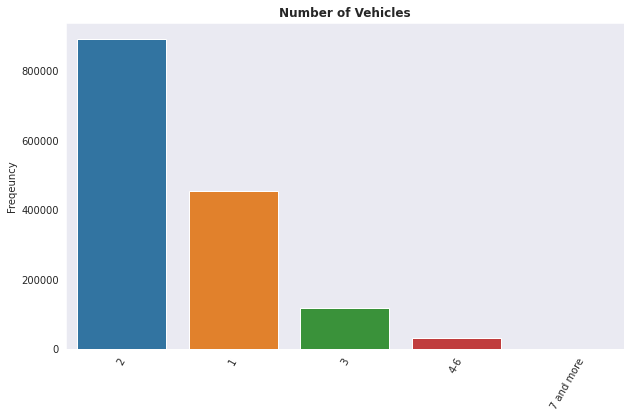

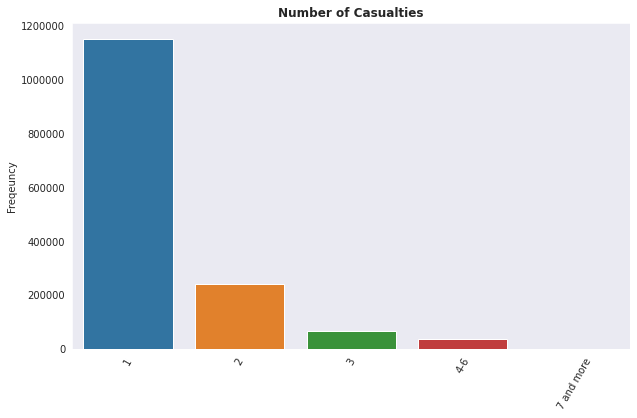

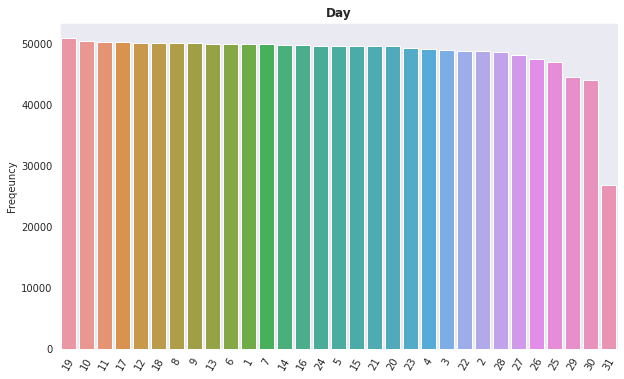

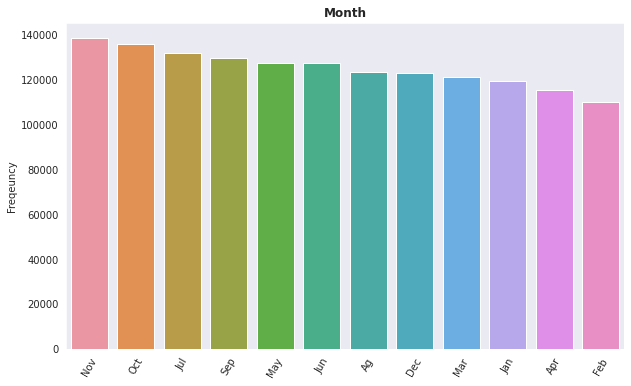

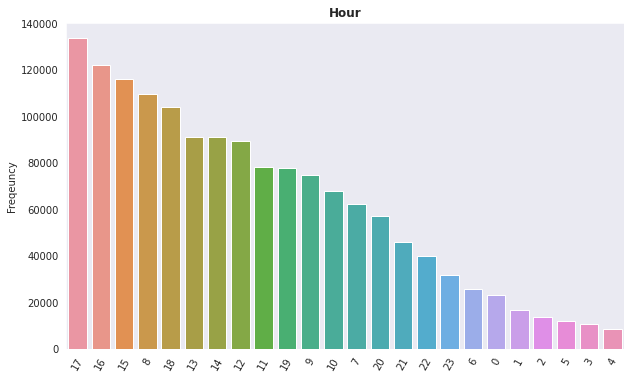

In [20]:
def plot_features(df):
  for feature in df.columns:
    var_value = df[feature].value_counts()
    
    plt.figure(figsize=(10,6))
    
    plt.grid(False)
    sns.barplot(x=var_value.index, y=var_value, order=var_value.index)
    
    plt.title(" ".join(feature.split("_")), weight="bold")
    plt.ylabel("Freqeuncy")
    plt.xticks(rotation=60)
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.show()
    
plot_features(dataset)

In [21]:
dataset.drop(dataset[dataset.Urban_or_Rural_Area == 3].index, axis=0, inplace=True)

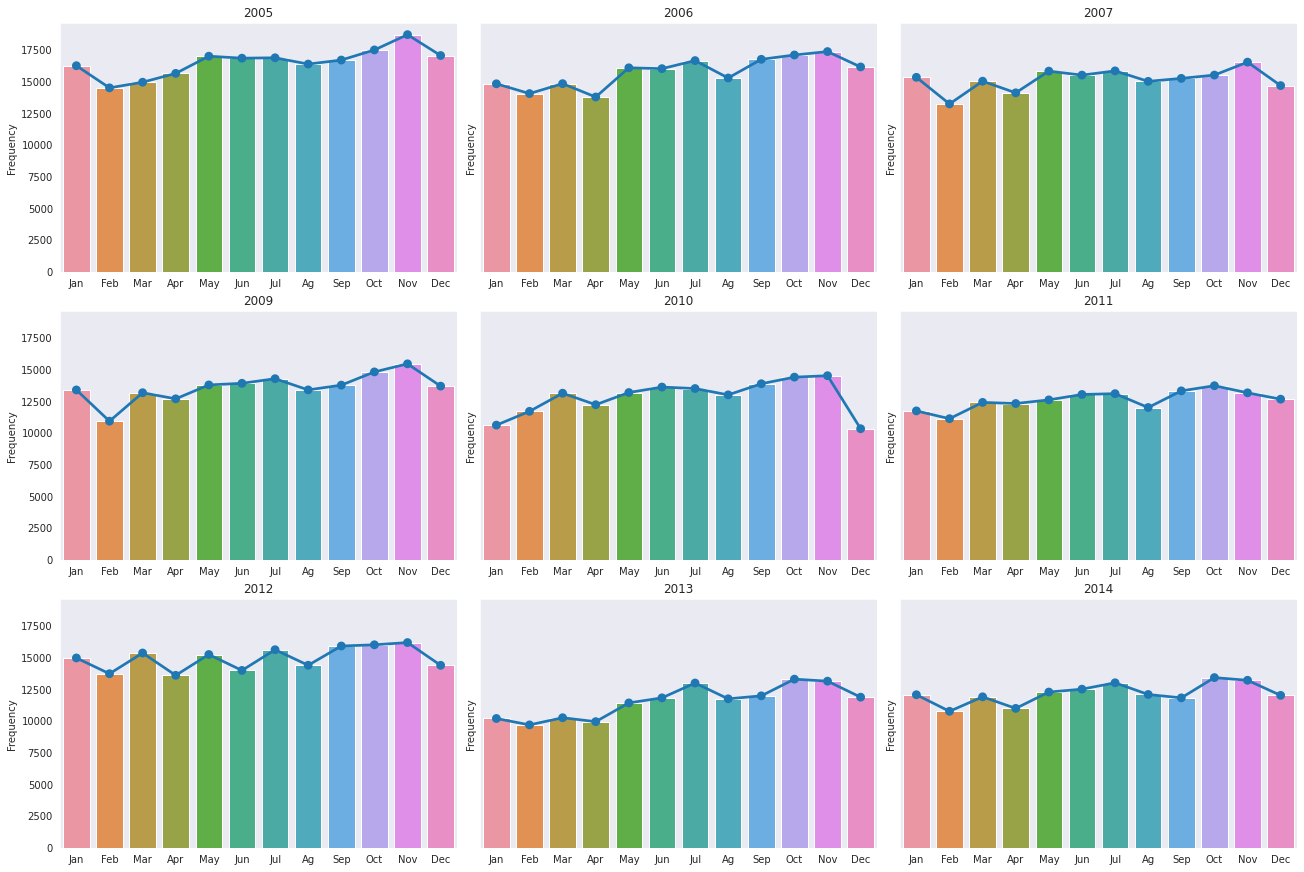

In [22]:
fig, ax = plt.subplots(3, 3, figsize=(18,12), sharey=True,
                       constrained_layout=True)

years = [2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014]

#months = {1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Ag", 
#         9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

idx = 0
for row in range(3):
    for column in range(3):
        var_value = dataset.Month[dataset.Year == years[idx]].value_counts()
        
        ax[row][column].grid(False)
        sns.barplot(ax=ax[row][column], x=var_value.index, y=var_value, order=months.values())
        sns.pointplot(ax=ax[row][column], x=var_value.index, y=var_value, order=months.values())
        
        ax[row][column].set_ylabel("Frequency")
        ax[row][column].set_title(years[idx])
        
        idx += 1
fig.show()

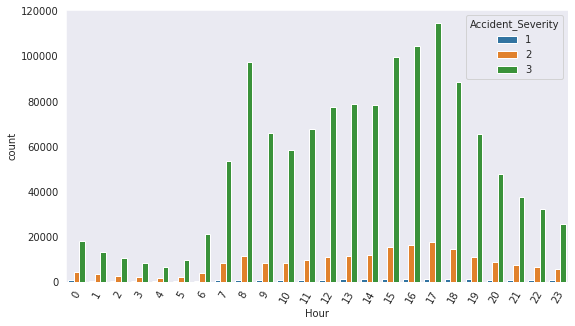

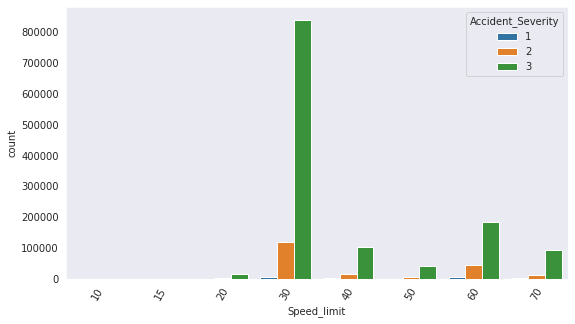

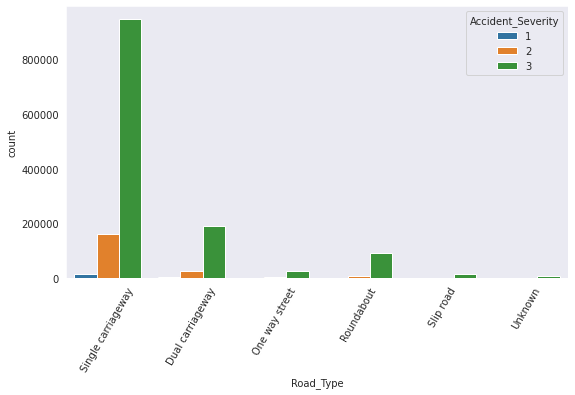

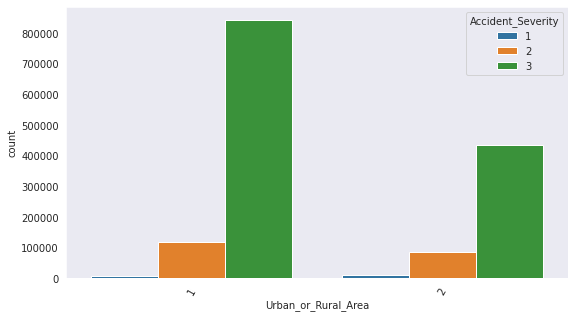

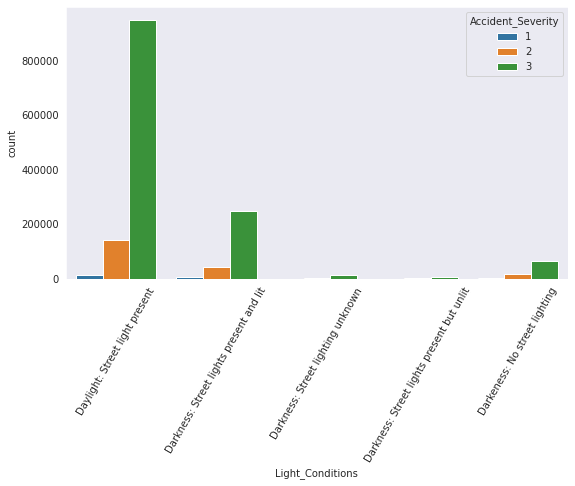

In [23]:
features = ["Hour", "Speed_limit", "Road_Type", "Urban_or_Rural_Area", "Light_Conditions"]

for feature in features:
    plt.figure(figsize=(9,5))
    
    sns.countplot(x=dataset[feature], hue="Accident_Severity",
                  data=dataset)
    plt.grid(False)
    
    plt.xticks(rotation=60)
    

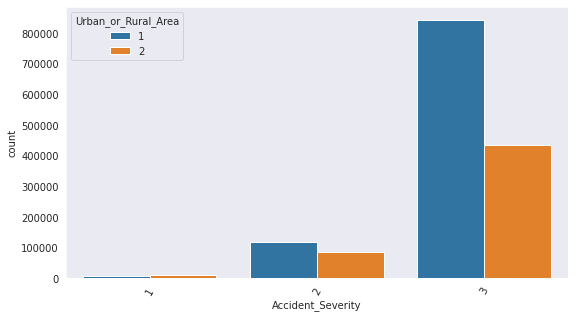

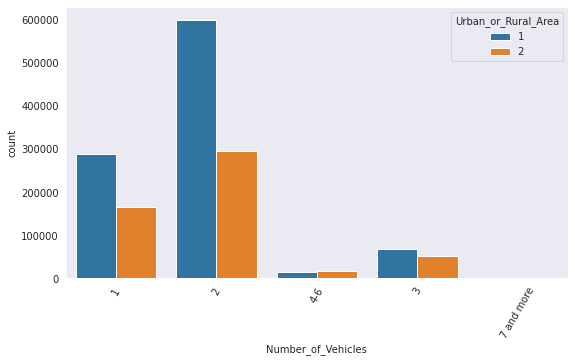

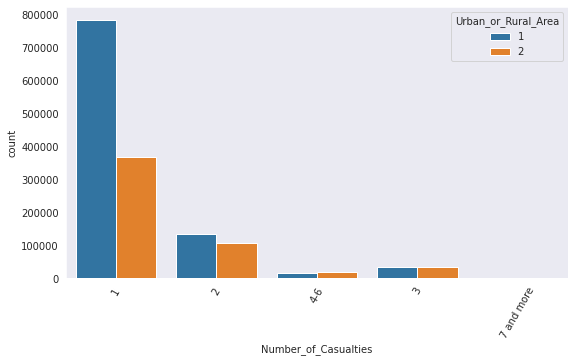

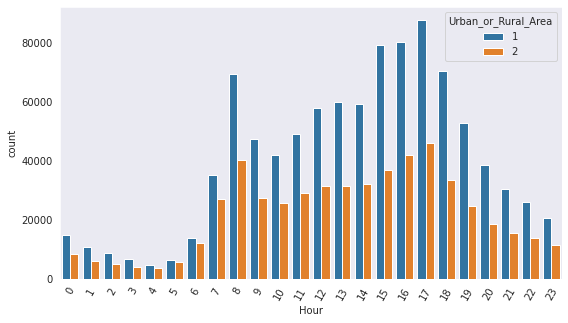

In [24]:
features = ["Accident_Severity", "Number_of_Vehicles", "Number_of_Casualties", "Hour"]

for feature in features:
    plt.figure(figsize=(9,5))
    
    sns.countplot(x=dataset[feature], hue="Urban_or_Rural_Area",
            data=dataset)
    plt.grid(False)
    
    plt.xticks(rotation=60)

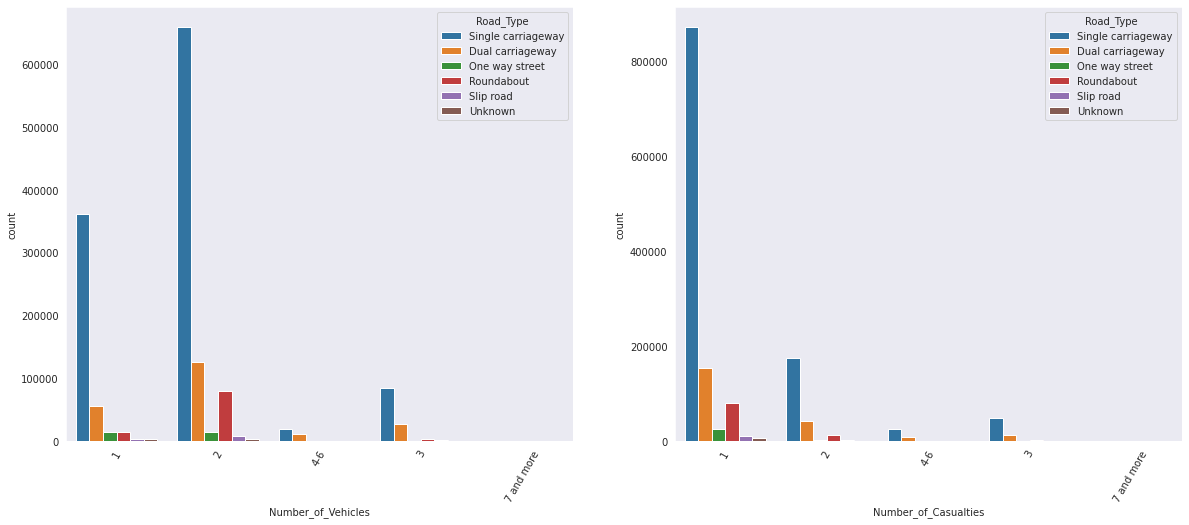

In [25]:
features = ["Number_of_Vehicles", "Number_of_Casualties"]

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.countplot(x=dataset.Number_of_Vehicles, hue="Road_Type",
            data=dataset)
plt.grid(False)
plt.xticks(rotation=60)

plt.subplot(1, 2, 2)
sns.countplot(x=dataset.Number_of_Casualties, hue="Road_Type",
            data=dataset)
plt.grid(False)
plt.xticks(rotation=60)


plt.show()